In [1]:
import matplotlib.pyplot as plt
import pickle as pkl
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from yellowbrick.model_selection import ValidationCurve
from sklearn.model_selection import StratifiedKFold, LeaveOneOut
from joblib import load

In [2]:
with open('fragments/pca_x.joblib', 'rb') as f: x = load(f)
with open('fragments/pca_y.joblib', 'rb') as f: y = load(f)

C:\Users\christos\anaconda3\lib\site-packages\sklearn\base.py:213: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


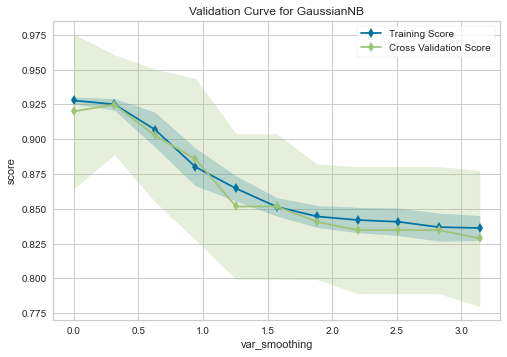

In [3]:
# https://numpy.org/doc/stable/reference/generated/numpy.var.html
# https://www.scikit-yb.org/en/latest/api/model_selection/cross_validation.html?highlight=scoring#classification

cv = StratifiedKFold(10)
# cv = LeaveOneOut()

# total_gr_in_gs = 3.143000
# pca component a = 2.97642789
# orientImp = 0.191396
# threshold = 0.16


viz = ValidationCurve(GaussianNB(), param_name="var_smoothing", 
                      param_range=np.arange(0, 3.14300, 0.314), 
#                       param_range=np.arange(0, 2.97642789, 0.2976), 
                      cv=cv, scoring="f1_weighted", n_jobs=4)
viz.fit(x, y)
viz.show()

In [4]:
%qtconsole